# Best Neighborhood in Pittsburgh

## Team Burgh Explorers

## Introduction

Pittsburgh is a big city with lots of neighborhoods. We The Burgh Explorers have been doing our research for the past month in figuring out what is the best neigborhood here in Pittsburgh. Having around 90 neighborhoods, every neighborhood has an area where it is best at. But out of every factors that can determine the best neighborhood, we used:

- Number of POGOH bike stations along with its concentration
- Number of Public Schools
- Number of Affordable Housing Distributed
    


## Metrics Used

### We determined our metric by selecting the deciding element for the following criteria.

#### Total Docks in Neighborhood

The total number of bike docks in a neighborhood is an important indicator of how well that area is supported by the bikeshare system. Neighborhoods with more docks generally provide greater availability and reliability for riders, because more docks mean a higher capacity for bikes to be picked up or returned at any given time. This reduces the likelihood of empty stations (no bikes to rent) or full stations (no space to return a bike), which directly improves the convenience of using the system.

For this reason, we used a data table from WPRDC's "https://data.wprdc.org/dataset/station-locations" a data that was made on October 2025 containing a list of bike stations at a specific locations across Pittsburgh.

For "Number of POGOH bike stations", I examined bikeshare station data to evaluate which neighborhood could be considered the “best” based on station and dock availability. Using the dataset fields (Id, Name, Total Docks, Latitude, Longitude, Neighborhood), I grouped stations by neighborhood and calculated key metrics such as the total number of stations, total docks, and dock density (average docks per station). Comparing these metrics allowed me to identify which neighborhoods are most highly served by bikeshare infrastructure and to reason about which might be considered the most convenient or best-supported areas for riders.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets as fp

# Load your pogo station dataset
pogoh_data = pd.read_csv("pogoh-station-locations-october-2025.csv")
area_df = pd.read_csv("neighborhoods.csv")
area_df = area_df.rename(columns={"hood": "Neighborhood"})

# Define converter function
def latlon_to_neighborhood(row):
    return fp.geo_to_neighborhood(row['Latitude'], row['Longitude'])

# Apply conversion to each row
pogoh_data['Neighborhood'] = pogoh_data.apply(latlon_to_neighborhood, axis=1)


ModuleNotFoundError: No module named 'fpsnippets'

In [ ]:
pogoh_counts = pogoh_data['Neighborhood'].value_counts()

# Convert to DataFrame and rename the column
pogoh_counts_df = pogoh_counts.rename_axis('Neighborhood').reset_index(name='Number of Pogoh Stations')

pogoh_counts_df.style.hide(axis="index")


Neighborhood,Number of Pogoh Stations
Central Oakland,7
Central Business District,6
Shadyside,5
South Side Flats,4
North Oakland,4
Hazelwood,3
Bloomfield,3
Strip District,3
Homewood South,3
South Shore,2


For "Total docks per neighborhood", which determines the number of docks across the whole neighborhood:

In [ ]:
dock_counts_df = (
    pogoh_data.groupby("Neighborhood")["Total Docks"]
             .sum()
             .rename("Total Number of Docks")
             .reset_index()
)

dock_counts_df.sort_values(by=['Total Number of Docks'], ascending=False).style.hide(axis="index")

Neighborhood,Total Number of Docks
Central Oakland,144
Central Business District,98
North Oakland,88
Shadyside,87
South Side Flats,76
Strip District,53
Bloomfield,49
Hazelwood,49
Homewood South,45
Allegheny Center,38


- Best: Central Oakland with 144 docks
- Worst: Central Lawrenceville, East Liberty, Middle Hill,	Friendship, and	Larimer	with 15 docks each.

According to the bar graph below, it does not come to a suprise that Central Oakland having the most bike docks across the neighborhood as it is a home to colleges like the University of Pittsburgh.

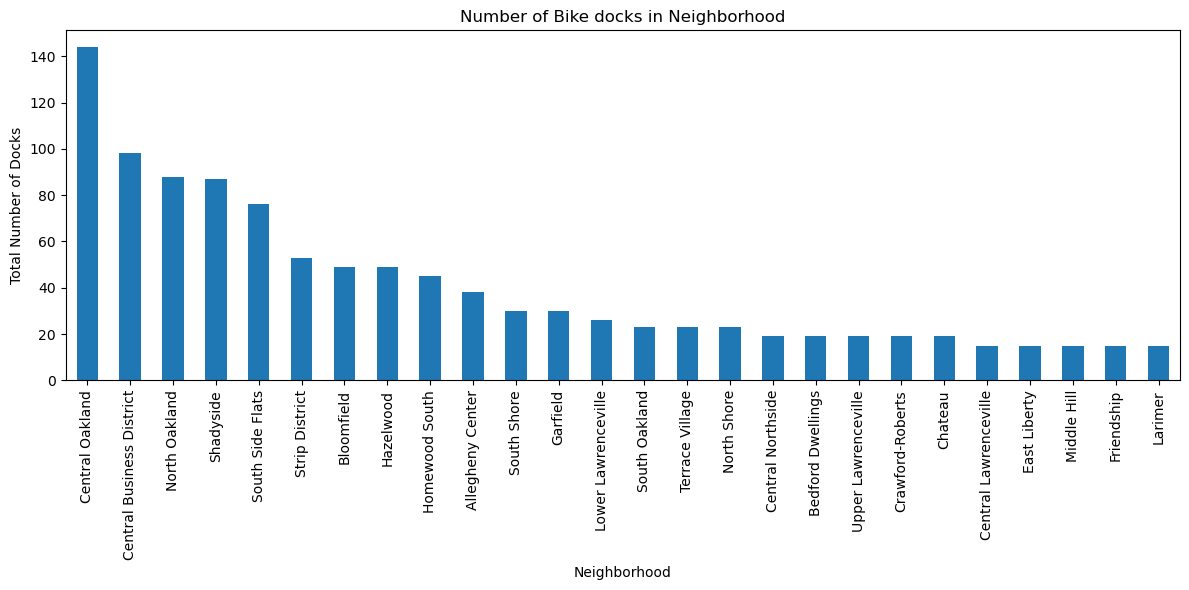

In [ ]:
plt.figure(figsize=(12, 6))
dock_counts_df.set_index('Neighborhood')['Total Number of Docks'] \
    .sort_values(ascending=False) \
    .plot(kind='bar')

plt.xlabel("Neighborhood")
plt.ylabel("Total Number of Docks")
plt.title("Number of Bike docks in Neighborhood")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The heatmap below visualizes the spatial distribution of POGOH stations across Pittsburgh by weighting each location according to its total number of docks. Areas with higher dock counts appear as brighter, more concentrated regions, indicating neighborhoods with stronger bike-share infrastructure. This representation makes it easy to identify clusters of high-capacity stations and highlights where bike-share availability is most dense throughout the city.

In [ ]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# Create base map centered on Pittsburgh
m = folium.Map(location=[40.4406, -79.9959], zoom_start=13)
pogoh_data = pd.read_csv("pogoh-station-locations-october-2025.csv")

# Clean the dataset to remove missing lat/lon/dock values
df_clean = pogoh_data[['Latitude', 'Longitude', 'Total Docks']].dropna()

# Prepare weighted heatmap data
heat_data = df_clean[['Latitude', 'Longitude', 'Total Docks']].values.tolist()

# Add HeatMap layer
HeatMap(
    heat_data,
    radius=25,
    blur=15,
    max_zoom=1
).add_to(m)

m

#### Number and Concentration of Public Schools

To evaluate Pittsburgh neighborhoods using only the school dataset, I created a metric based on the number of public schools located in each neighborhood. Using the 'Final-Project-Snippets' file, I mapped every school to its corresponding neighborhood using latitude and longitude, then counted how many schools each neighborhood contains. The core idea behind this metric is that a higher concentration of public schools represents stronger educational access, more community resources, and greater support for families. After calculating these counts, I normalized the values onto a 0–10 scale so neighborhoods could be compared fairly, regardless of size. This allows me to identify which neighborhoods offer the greatest access to educational infrastructure and therefore score the highest based solely on school presence.

For this reason, we used a data table from WPRDC's "https://data.wprdc.org/dataset/pittsburgh-public-school-locations" a data that was made on April 2019 containing a list of public schools at a specific locations across Pittsburgh.

For number of public schools per neighborhood, using the data given we determine:

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets

# Load your pogo station dataset
school_data = pd.read_csv("pps_schoolsapr2019publish.csv")
area_df = pd.read_csv("neighborhoods.csv")
area_df = area_df.rename(columns={"hood": "Neighborhood"})

# Define converter function
def latlon_to_neighborhood(row):
    return fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])

# Apply conversion to each row
school_data['Neighborhood'] = school_data.apply(latlon_to_neighborhood, axis=1)

In [ ]:
school_counts = school_data['Neighborhood'].value_counts()

# Convert to DataFrame and rename the column
school_counts_df = school_counts.rename_axis('Neighborhood').reset_index(name='Number of Schools')
school_counts_df

,Neighborhood,Number of Schools
0,Squirrel Hill South,6
1,Allegheny Center,6
2,Beechview,5
3,Brookline,5
4,Carrick,5
5,East Liberty,4
6,Manchester,4
7,Brighton Heights,3
8,Crafton Heights,3
9,North Oakland,3


The other metric we have used is the concentration of schools. We defined it as the number of schools the neighborhood encapsulates in its respectable area. We have used the dataset from "https://data.wprdc.org/dataset/neighborhoods2/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99" which we extracted the area in square miles from the neighborhoods of Pittsburgh. So merging our calculations of the number of schools in each neighborhoods we have done above, we managed to draw a table where we organized the neighborhood along with its area(square miles), number of schools and its proportion of number of schools to area of neighborhood.

In [ ]:
merged = school_counts_df.merge(area_df, on="Neighborhood", how="left")
# merged.head(1)

In [ ]:
merged["schools_per_sq_mi"] = merged["Number of Schools"] / merged["sqmiles"]
final_df = merged[[
    "Neighborhood",
    "Number of Schools",
    "sqmiles",
    "schools_per_sq_mi"
]]
final_df.head(46).sort_values(
    by="schools_per_sq_mi",
    ascending=False
).reset_index()

,index,Neighborhood,Number of Schools,sqmiles,schools_per_sq_mi
0,1,Allegheny Center,6,0.208937,28.716815
1,13,Mt. Oliver,2,0.103298,19.361549
2,26,Friendship,2,0.106191,18.833915
3,6,Manchester,4,0.279049,14.334423
4,25,Homewood West,2,0.195203,10.245731
5,10,Lower Lawrenceville,3,0.429944,6.977651
6,30,Allegheny West,1,0.144794,6.906349
7,5,East Liberty,4,0.581379,6.880194
8,20,Allentown,2,0.296998,6.734046
9,17,Middle Hill,2,0.305141,6.554356


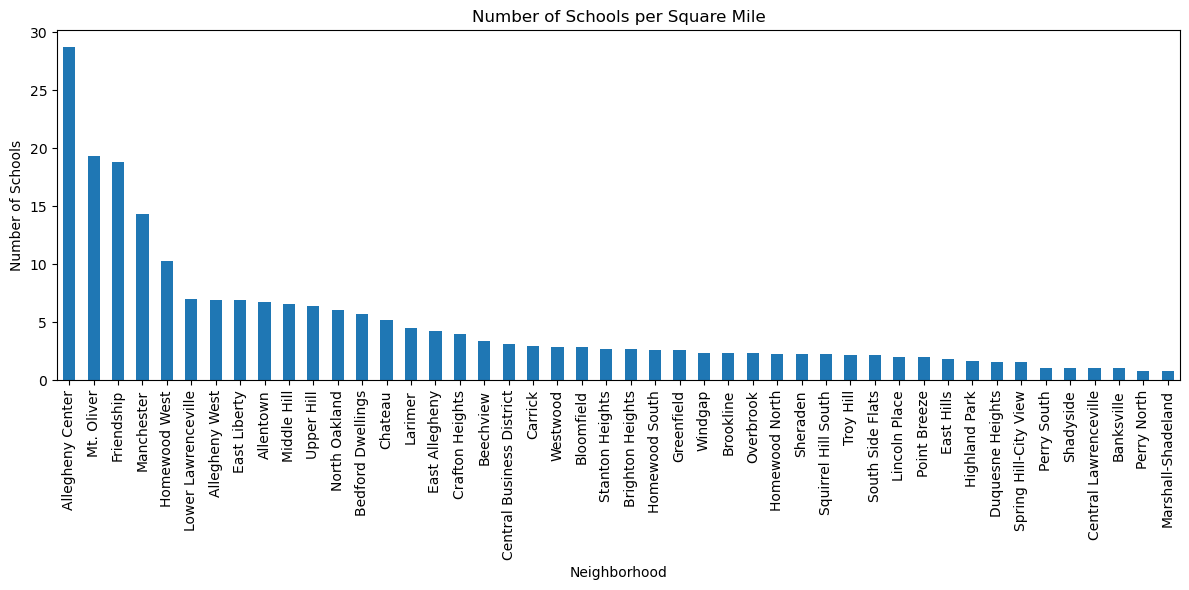

In [ ]:
plt.figure(figsize=(12, 6))

final_df.set_index('Neighborhood')['schools_per_sq_mi'] \
    .sort_values(ascending=False) \
    .plot(kind='bar')

plt.xlabel("Neighborhood")
plt.ylabel("Number of Schools")
plt.title("Number of Schools per Square Mile")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


According to the Bar Graph we illustrated above, in terms of the ratio of 'number of schools' to 'area of neighborhood', we can easily determine:
- Best: Allegheny Center
- Worst: Marshall-Shadeland

#### Number of Affordable Housing Distributed

I wanted to determine the scale of numbers that would show how affordable housing is in Pittsburgh neighborhoods. 
The metric system that I created was based on the amount of loans that residents received between the years of 2022-2024 for 
home improvement and renovation in each neighborhood. Using the the dataset of information from the 'WPRDC' website 
called "ACED Allegheny Home Improvement Loan Program 2022-2024," I averaged how many each neighborhood got over the years 
and listed all neighborhoods involved. 
I chose affordable housing to determine the amount of infrastructure that Pittsburgh distributes to its residents to see 
if they prioritize Pittburgh's homelessness levels and care for residents. This would represent Pittsburgh's local government's 
efficiency along with their ability to create a stronger, inclusive financially improved community.

For this reason, we used a data table from WPRDC's "https://data.wprdc.org/dataset/aced-allegheny-home-improvement-loan-program-ahilp" a data that was made on September 2022 containing a list of neighborhoods in and surrounding Pittsburgh.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("ahilp-loan-data-for-2022-thru-2024.csv")

# Step 1: get total loan amount per municipality (neighborhood) per year

yearly_totals = ( 
    df.groupby(['MUNICIPALITY', 'YEAR'])['TOTAL LOAN AMOUNT']
    .sum()
    .reset_index())

print("Below is the total loan money each muncipality (neighborhood) received per year in alphabetical order.")
display(yearly_totals.style.format({"TOTAL LOAN AMOUNT": "{:,.2f}"}))

# STEP 2: Get average total loan amount (2022-2024) per municipality

average_loans = (
    yearly_totals.groupby('MUNICIPALITY')['TOTAL LOAN AMOUNT']
    .mean()
    .reset_index(name='AVERAGE TOTAL LOAN AMOUNT (2022-2024)'))

average_loans = average_loans.sort_values(
    'AVERAGE TOTAL LOAN AMOUNT (2022-2024)', ascending=False)

print("Average loan money per municipality from highest to lowest (2022-2024):")
display(average_loans.style.format({"AVERAGE TOTAL LOAN AMOUNT (2022-2024)": "{:,.2f}"}))

Below is the total loan money each muncipality (neighborhood) received per year in alphabetical order.


,MUNICIPALITY,YEAR,TOTAL LOAN AMOUNT
0,ASPINWALL,2024,"23,500.00"
1,BALDWIN BOROUGH,2023,"25,459.00"
2,BALDWIN BOROUGH,2024,"22,500.00"
3,BALDWIN TWP,2022,"24,500.00"
4,BELLEVUE,2024,"9,300.00"
5,BEN AVON,2024,"13,900.00"
6,BETHEL PARK,2022,"16,796.00"
7,BETHEL PARK,2023,"10,467.50"
8,BETHEL PARK,2024,"66,000.00"
9,BLAWNOX,2024,"5,725.00"


Average loan money per municipality from highest to lowest (2022-2024):


,MUNICIPALITY,AVERAGE TOTAL LOAN AMOUNT (2022-2024)
28,PLUM,"66,120.00"
33,SHALER,"47,665.00"
29,PORT VUE,"32,700.00"
32,SCOTT,"31,135.00"
42,WILKINSBURG,"31,115.00"
5,BETHEL PARK,"31,087.83"
20,MONROEVILLE,"29,180.83"
39,WEST MIFFLIN,"29,069.65"
36,SWISSVALE,"26,500.00"
2,BALDWIN TWP,"24,500.00"


To summarize the neighborhoods that have been funded the most, 
I chose to create a graph
of the top 10 most financially supported neighborhoods. 

Taking into account how much
this can affect civilians, we determined that Plum Borough was 
the most supported,
most likely making it the the most habitable place for residents
for quality living.

#### Graph

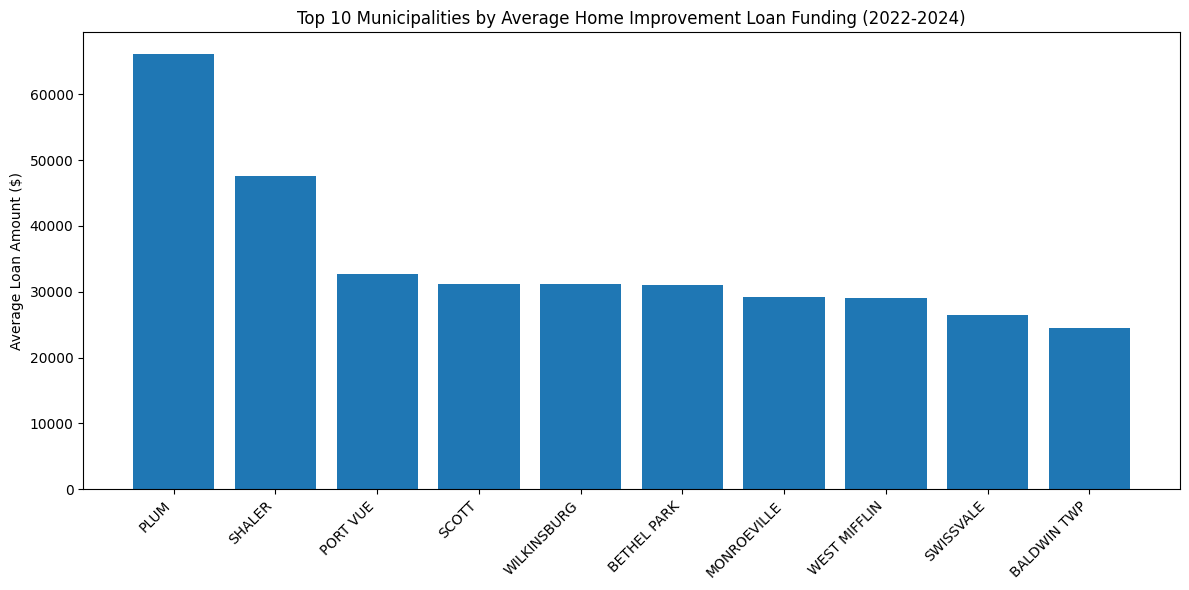

In [ ]:
top10 = average_loans.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['MUNICIPALITY'], top10['AVERAGE TOTAL LOAN AMOUNT (2022-2024)'])
plt.xticks(rotation=45, ha='right')

plt.ylabel("Average Loan Amount ($)")
plt.title("Top 10 Municipalities by Average Home Improvement Loan Funding (2022-2024)")
plt.tight_layout()
plt.show()

According to the Bar Graph and provided tables we illustrated above, in terms of the ratio of 'number of schools' to 'area of neighborhood', we can easily determine:
- Best: Plum
- Worst: West Deer Township

# The Best Neighborhood

To come to a conclusion, where our main objective is to find the best neighborhood that satisfies the best infrastructure accessibility for families we balanced the metrics above to get a score out of one where a score denotes that it provides the best of all metrics used making it an undeniably perfect neighborhood in Pittsburgh.

Since we find the opportunity of common Neighborhoods while computing the "Concentration of Public Schools" and "Total Number of POGOH bike", this makes it relatively easier to compute the score of the best neighborhood. So, in the code below, we merged the first two metrics into one dataframe, allowing us to proceed to compute the normalized score.  Min–max normalization rescales each value in a column to a standardized range between 0 and 1, making the data easier to compare across metrics that originally had different scales. For each value, the code subtracts the column’s minimum, then divides by the range (maximum minus minimum). As a result, the smallest value in the column becomes 0, the largest becomes 1, and all other values fall proportionally in between.

In [ ]:
df = final_df.merge(dock_counts_df, on='Neighborhood', how='left')


NameError: name 'final_df' is not defined

In [ ]:
df['schools_norm'] = (df['Number of Schools'] - df['Number of Schools'].min()) / \
                     (df['Number of Schools'].max() - df['Number of Schools'].min())

df['docks_norm'] = (df['Total Number of Docks'] - df['Total Number of Docks'].min()) / \
                   (df['Total Number of Docks'].max() - df['Total Number of Docks'].min())


We planned to weigh these two metrics in a way that they are not perfectly balanced but are relatively balanced. We understand that different families have different priorities when it comes to what neighborhood is best for them to live in. We concluded that many families would have children, so education will stand as a priority in comparison with number of bike docks as Pittsburgh offers many modes of transportation such as Buses, Trains etc... So we came up to a decision to give **concentration of schools** a weight of **'0.6'** and **number of bikes** a weight of **'0.4'**.

In [ ]:
weight_schools = 0.6
weight_pogoh = 0.4  

df['score'] = (
    weight_schools * df['schools_norm'] +
    weight_pogoh * df['docks_norm']
)
df


,Neighborhood,Number of Schools,sqmiles,schools_per_sq_mi,Total Number of Docks,schools_norm,docks_norm,score
0,Squirrel Hill South,6,2.676605,2.241645,NaN,1.0,NaN,NaN
1,Allegheny Center,6,0.208937,28.716815,38.0,1.0,0.277108,0.710843
2,Beechview,5,1.459201,3.426532,NaN,0.8,NaN,NaN
3,Brookline,5,2.088930,2.393570,NaN,0.8,NaN,NaN
4,Carrick,5,1.669530,2.994855,NaN,0.8,NaN,NaN
5,East Liberty,4,0.581379,6.880194,15.0,0.6,0.000000,0.360000
6,Manchester,4,0.279049,14.334423,NaN,0.6,NaN,NaN
7,Brighton Heights,3,1.117022,2.685712,NaN,0.4,NaN,NaN
8,Crafton Heights,3,0.751317,3.992990,NaN,0.4,NaN,NaN
9,North Oakland,3,0.497002,6.036193,88.0,0.4,0.879518,0.591807


As shown above, once we computed the scores using the normalization formula we used, we noticed that some neighborhoods don't offer bike stations hence not allowing us to give a score in the 0-1 scale. We find this to happen because of the  ratio amount of neighborhoods that have POGOH stations to amount of public schools is less than one meaning 15+ neighborhoods that have public schools in Pittsburgh do not have POGOH stations. So as we are committed to find the best neighborhood that satisfies these two metrics so we cleaned by filtering the neighborhoods that offer both education and mobility access.

In [ ]:
clean = df.dropna(subset=['schools_norm','docks_norm'])
clean['score'] = (
    weight_schools * clean['score'] +
    weight_pogoh * clean['docks_norm'])
clean.sort_values(by="score",
    ascending=False).reset_index()


/scratch/slurm-26224/ipykernel_1493276/3796674133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['score'] = (


,index,Neighborhood,Number of Schools,sqmiles,schools_per_sq_mi,Total Number of Docks,schools_norm,docks_norm,score
0,18,Central Business District,2,0.645632,3.097740,98.0,0.2,1.000000,0.712000
1,9,North Oakland,3,0.497002,6.036193,88.0,0.4,0.879518,0.706892
2,35,Shadyside,1,0.920161,1.086766,87.0,0.0,0.867470,0.555181
3,27,South Side Flats,2,0.924317,2.163761,76.0,0.2,0.734940,0.542361
4,1,Allegheny Center,6,0.208937,28.716815,38.0,1.0,0.277108,0.537349
5,14,Bloomfield,2,0.701931,2.849284,49.0,0.2,0.409639,0.334169
6,37,Homewood South,1,0.387148,2.582991,45.0,0.0,0.361446,0.231325
7,10,Lower Lawrenceville,3,0.429944,6.977651,26.0,0.4,0.132530,0.228819
8,5,East Liberty,4,0.581379,6.880194,15.0,0.6,0.000000,0.216000
9,11,Chateau,2,0.382512,5.228590,19.0,0.2,0.048193,0.102843


# Insightful Conclusion

**Abel Sebhatu:** Combining these metrics, Neighborhoods with a high density of schools and a high number of bike-share docks tend to score the best. In this dataset, areas such as the **Central Business District** and **North Oakland** rank highest because they balance strong school access with abundant docking stations. In contrast, neighborhoods with few schools per square mile and low dock availability—such as **Central Lawrenceville** and **Bedford Dwellings** receive the lowest scores. Overall, the scoring highlights where infrastructure for both education and mobility is jointly strong versus where improvements could be targeted. But I personally will give the award to **Central Business District (Downtown)** for offering much more opportunities aside of the metrics we have done above.

**Sharon Joseph:** Combining these metrics, Neighborhoods with a higher amount of affordable
and quality housing along with bike shares and high density of schools tend to score the best. With North Oakland, Plum Borough,
and Central Business District (Downtown) having their good qualities, we are able to look at the data we have and make a
decision of which neighborhood is the best.

